##Mounting drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd /content/drive/My\ Drive/Data_mining/Lab3/Notebooks
!ls

/content/drive/My Drive/Data_mining/Lab3/Notebooks
Kmeans.ipynb  Kmedoids.ipynb  RunAndPlot.ipynb


#Installing Packages

In [23]:
!pip install ipynb

##Importing Libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
import csv
import time
import re
import tracemalloc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from ipynb.fs.full.Kmeans import runKmeans
from ipynb.fs.full.Kmedoids import runKmedoids

plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plotStyles = {
    'markers' : ["o","^","*","p","s","X","d"],
    'color' : ['#6c5ce7','#2d3436','#00cec9', '#0984e3',  '#6c5ce7' , '#00b894','#74b9ff', '#d63031', '#273c75',   '#74b9ff'],
    'lineStyle' : 'solid',
    'markerSize' :  10,
  }

#Installing Packages

In [25]:
!pip install ipynb

In [26]:
randomState = 123
path = '/content/drive/My Drive/Data_mining/Lab3'

In [27]:
def runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK = 12, Y= np.array([]), groundTruth= False):
  # process data
  XNum = XNum.astype(float)
  XNum= (XNum-np.min(XNum, axis=0))/(np.max(XNum, axis =0)-np.min(XNum, axis =0))
  withinClusterVarsKmeans, silhoutteCoeffKmeans, withinClusterVarsKmedoids, silhoutteCoeffKmedoids = np.array([]), np.array([]), np.array([]), np.array([])
  bcubedPrecisionsKmeans, bcubedRecallsKmeans, bcubedPrecisionsKmedoids, bcubedRecallsKmedoids = np.array([]), np.array([]), np.array([]), np.array([])
  for k in range(2,mxK+1):
    cache = runKmeans(XNum, XNom, XOrd, noOfInstances, noOfIter = noOfIter, k=k, Y=Y, groundTruth= groundTruth)
    withinClusterVarsKmeans= np.append(withinClusterVarsKmeans, cache['withinClusterVar'])
    silhoutteCoeffKmeans= np.append(silhoutteCoeffKmeans, cache['silhoutteCoeff'])
    bcubedPrecisionsKmeans= np.append(bcubedPrecisionsKmeans, cache['bcubedPrecision'])
    bcubedRecallsKmeans= np.append(bcubedRecallsKmeans, cache['bcubedRecall'])

    cache = runKmedoids(XNum, XNom, XOrd, noOfInstances, noOfIter = noOfIter, k=k, Y=Y, groundTruth= groundTruth)
    withinClusterVarsKmedoids= np.append(withinClusterVarsKmedoids, cache['withinClusterVar'])
    silhoutteCoeffKmedoids= np.append(silhoutteCoeffKmedoids, cache['silhoutteCoeff'])
    bcubedPrecisionsKmedoids= np.append(bcubedPrecisionsKmedoids, cache['bcubedPrecision'])
    bcubedRecallsKmedoids= np.append(bcubedRecallsKmedoids, cache['bcubedRecall'])
  results = {
    'Variance': {
        'Kmeans' : withinClusterVarsKmeans,
        'Kmedoids': withinClusterVarsKmedoids
    },
    'Silhouette Coeff': {
        'Kmeans' : silhoutteCoeffKmeans,
        'Kmedoids': silhoutteCoeffKmedoids
    },    
    'BCubed Precision': {
        'Kmeans' : bcubedPrecisionsKmeans if groundTruth else np.array([]) ,
        'Kmedoids': bcubedPrecisionsKmedoids if groundTruth else np.array([])
    },    
    'BCubed Recall': {
        'Kmeans' : bcubedRecallsKmeans if groundTruth else np.array([]),
        'Kmedoids': bcubedRecallsKmedoids if groundTruth else np.array([])
    }
  }
  return results

In [28]:
def plotElbow(dName, results, mxK, groundTruth= False):
  measures = []
  if groundTruth:
    measures = ['Variance', 'Silhouette Coeff', 'BCubed Precision', 'BCubed Recall']
  else:
    measures = ['Variance', 'Silhouette Coeff']
  plt.figure(figsize=(10*len(measures),10))

  methods = ['Kmeans', 'Kmedoids']

  for i in range(len(measures)):    
    plt.subplot(1, len(measures), i + 1).set_title('Dataset: {}'.format(dName), fontsize=20)
    lines = []
    labels = []
    for j in range(len(methods)):
      values = results[measures[i]][methods[j]]
      if measures[i] == 'Variance':
        plt.ylabel('1/{}'.format(measures[i]), fontsize=20)
        values = 1/values
      else:
        plt.ylabel('{}'.format(measures[i]), fontsize=20)
    
      line,  = plt.plot(np.arange(2, mxK+1), values, color=plotStyles['color'][j], linestyle=plotStyles['lineStyle'], 
                          marker=plotStyles['markers'][j], markersize=plotStyles['markerSize'], label=methods[j])
      plt.xlabel('No of Clusters (K)', fontsize=20)     
      labels.append(methods[j])
      lines.append(line)

    plt.legend(lines, labels, prop={'size': 18})      
  plt.show()

In [29]:
def savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= False):
  measures = []
  if groundTruth:
    measures = ['Variance', 'Silhouette Coeff', 'BCubed Precision', 'BCubed Recall']
  else:
    measures = ['Variance', 'Silhouette Coeff']
  plt.figure(figsize=(10,10))

  methods = ['Kmeans', 'Kmedoids']

  for i in range(len(measures)): 
    plt.clf()   
    lines = []
    labels = []
    for j in range(len(methods)):
      values = results[measures[i]][methods[j]]
      if measures[i] == 'Variance':
        plt.ylabel('1/{}'.format(measures[i]), fontsize=20)
        values = 1/values
      else:
        plt.ylabel('{}'.format(measures[i]), fontsize=20)
    
      line,  = plt.plot(np.arange(2, mxK+1), values, color=plotStyles['color'][j], linestyle=plotStyles['lineStyle'], 
                          marker=plotStyles['markers'][j], markersize=plotStyles['markerSize'], label=methods[j])
      plt.xlabel('No of Clusters (K)', fontsize=20)     
      labels.append(methods[j])
      lines.append(line)

    plt.legend(lines, labels, prop={'size': 18})      
    plt.savefig('{}/Plots/{}_{}.{}'.format(path, dName, measures[i], fileExt))

In [30]:
def plot_cluster(dName, methodName, X, K, clusterCenters, clusterLabels, fileExtension = "png"):
  plt.clf()
  color = ["red","green", "blue", "yellow", "coral", "teal", "cyan", "brown","black"]
  for k in range(K):
      plt.scatter(X[clusterLabels == k, 0], X[clusterLabels == k, 1], color=color[k])
  
  # print(clusterCenters)
  
  plt.scatter(clusterCenters[:, 0] , clusterCenters[:, 1], color="black")
  plt.savefig('{}/Plots/{}_cluster_{}.{}'.format(path, dName, methodName,fileExtension))

### Test Dataset

In [ ]:
# df = pd.read_csv('/content/drive/My Drive/Data_mining/Lab3/Datasets/test_dataset_2.data', sep=",",header=None)
# dName = 'test_dataset_2'
# noOfInstances = df.shape[0]
# print('instances = {}, features= {} '.format(df.shape[0], df.shape[1]))
# numInd = np.arange(df.shape[1])
# dfNum = df.iloc[:,numInd]
# XNum= dfNum.fillna(dfNum.mean()).to_numpy()
# Y= np.array([])
# XNom = np.array([])
# XOrd = np.array([])
# mxK = 10
# results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= False)
# # print(results)
# plotElbow(dName,results, mxK, groundTruth= False)
# savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= False)
# savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= False)

### Iris

no of unique Y label= 3
instances = 150, features= 4 
{'Kmeans': array([12.12779075,  6.98221647,  5.51693347,  4.58401418,  4.0508992 ,
        3.724157  ,  3.19627435,  2.98975861,  2.65879779]), 'Kmedoids': array([12.57406039,  7.51857227,  5.95561454,  5.04869024,  4.4039292 ,
        3.84194163,  3.46941072,  3.17987843,  2.91860726])}
{'Kmeans': array([0.63004713, 0.50476876, 0.44506549, 0.3481393 , 0.32865682,
       0.31890591, 0.33832619, 0.3111131 , 0.32494349]), 'Kmedoids': array([0.63004713, 0.50661176, 0.43692038, 0.34006566, 0.32169297,
       0.32825158, 0.32675054, 0.31377228, 0.30829387])}
{'Kmeans': array([0.66329966, 0.81588304, 0.83217189, 0.83217189, 0.93681159,
       0.93681159, 0.92666667, 0.94222222, 0.93481481]), 'Kmedoids': array([0.66329966, 0.83913978, 0.84526984, 0.84526984, 0.93973333,
       0.91777778, 0.92666667, 0.92666667, 0.91777778])}
{'Kmeans': array([1.        , 0.8244898 , 0.65496599, 0.48489796, 0.46122449,
       0.40897959, 0.38666667, 0.3297

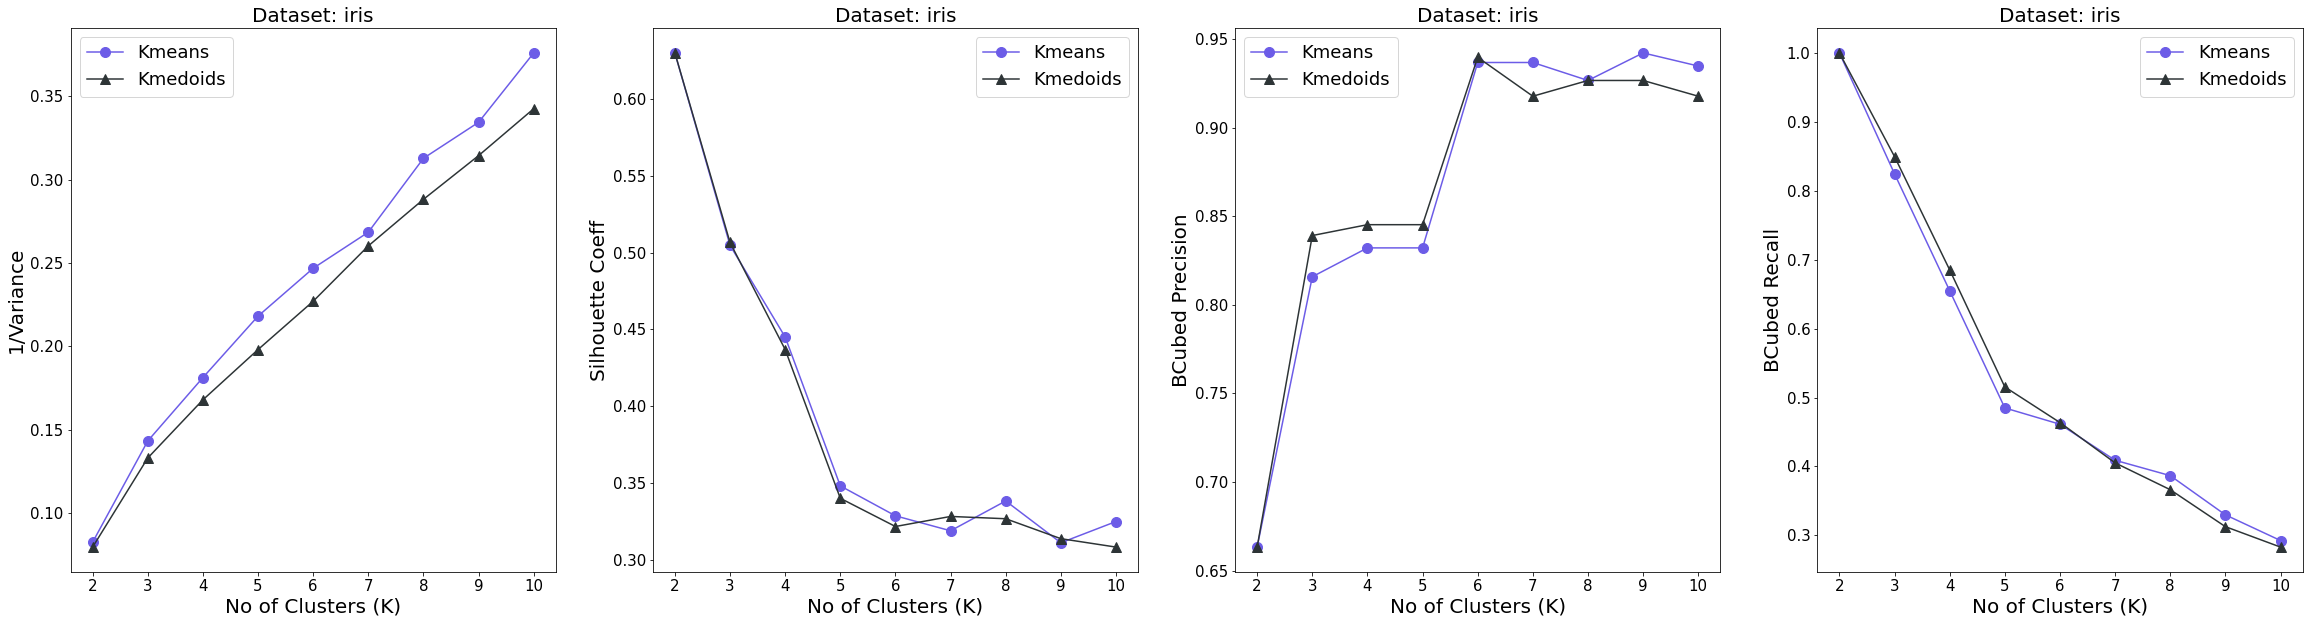

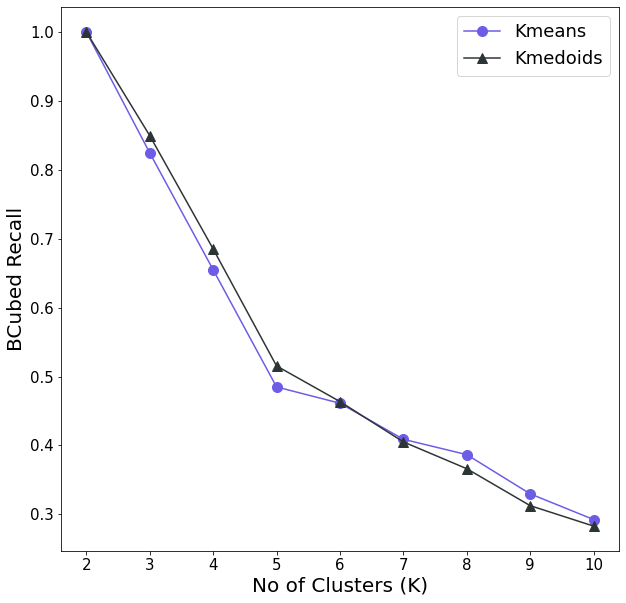

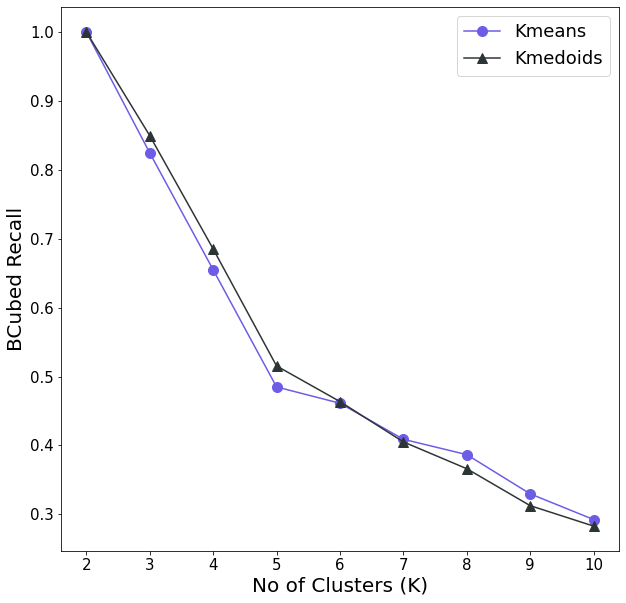

In [ ]:
from sklearn.datasets import load_iris
dName= 'iris'
X, Y = load_iris(return_X_y= True)
Y = np.squeeze(Y)
print('no of unique Y label=',len(np.unique(Y)))
noOfInstances = X.shape[0]
print('instances = {}, features= {} '.format(X.shape[0], X.shape[1]))
XNum= X
XNom = np.array([])
XOrd = np.array([])
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK= mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True)

### Wine

no of unique Y label= 3
instances = 178, features= 13 
{'Kmeans': array([64.53766702, 48.95403582, 45.30824155, 42.30154337, 39.81423171,
       37.93581714, 36.52898794, 35.57224712, 35.30840511]), 'Kmedoids': array([76.79639829, 60.20719167, 55.56657649, 51.48927835, 48.68950733,
       45.82930753, 44.02298086, 42.60267051, 40.84111874])}
{'Kmeans': array([0.29872218, 0.30134633, 0.23518938, 0.20686612, 0.21363544,
       0.21290575, 0.19356076, 0.12598971, 0.10808849]), 'Kmedoids': array([0.29327382, 0.28355917, 0.22876577, 0.16595863, 0.1065521 ,
       0.1141803 , 0.11797431, 0.10301395, 0.11214686])}
{'Kmeans': array([0.52446023, 0.91684687, 0.93149324, 0.9290387 , 0.89361899,
       0.91247285, 0.9002809 , 0.92416611, 0.8923445 ]), 'Kmedoids': array([0.52095645, 0.83631997, 0.87859131, 0.90120767, 0.88182535,
       0.90868233, 0.90173647, 0.9028856 , 0.91208277])}
{'Kmeans': array([0.82696629, 0.91717496, 0.77396264, 0.61767252, 0.56923803,
       0.52017926, 0.47151595, 0.348

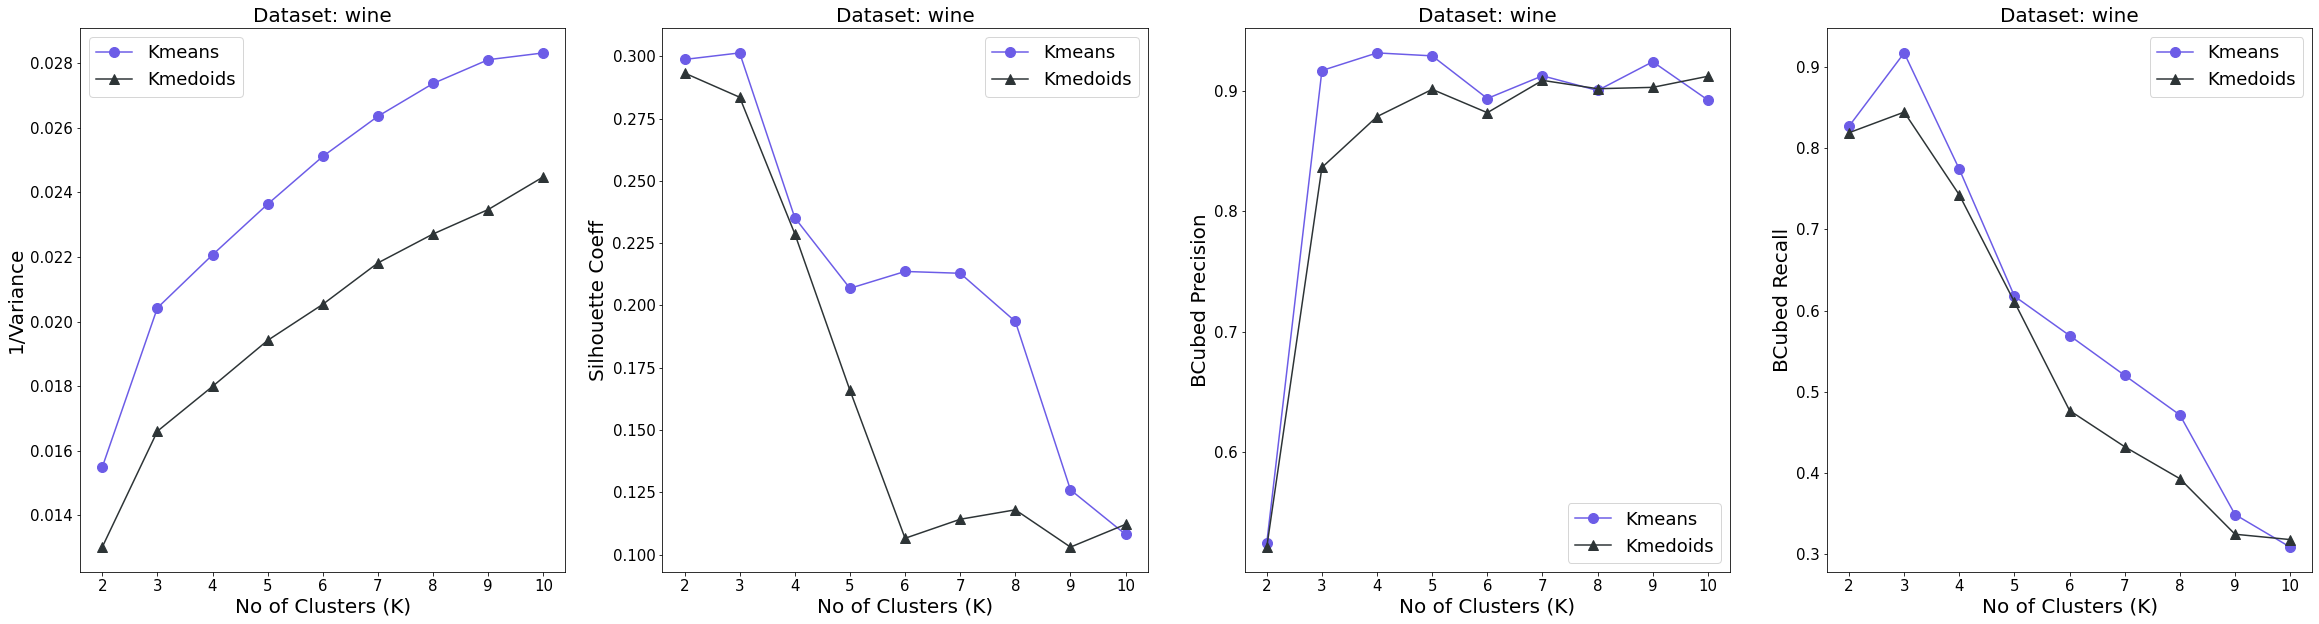

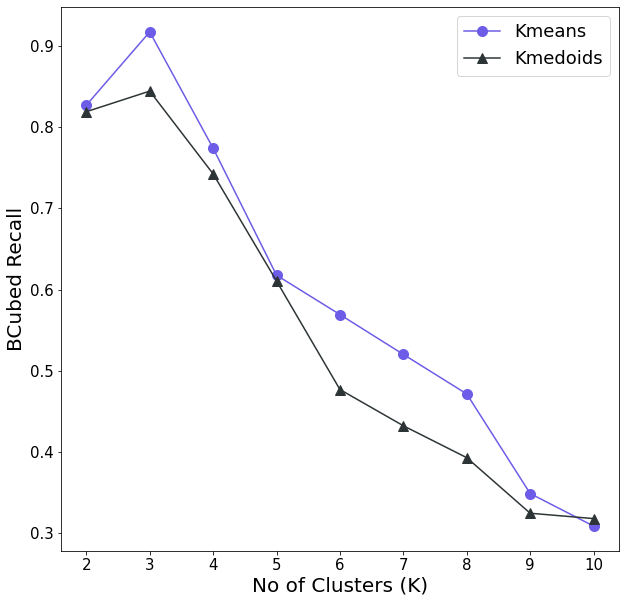

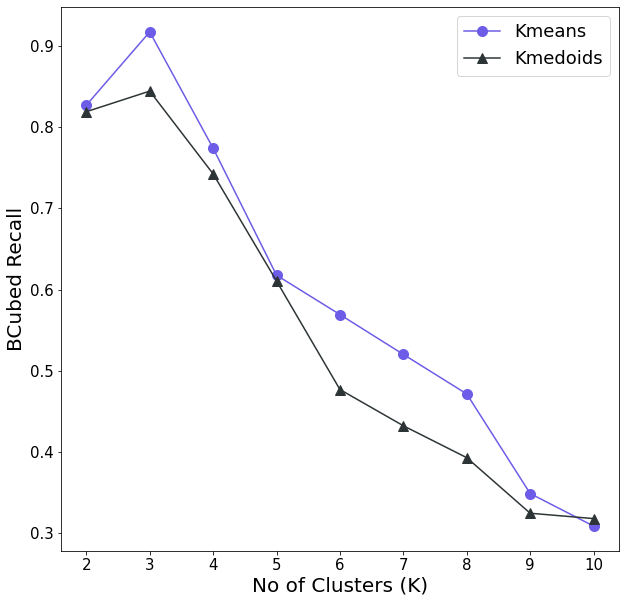

In [ ]:
from sklearn.datasets import load_wine
dName= 'wine'
X, Y = load_wine(return_X_y= True)
Y = np.squeeze(Y)
print('no of unique Y label=',len(np.unique(Y)))
noOfInstances = X.shape[0]
print('instances = {}, features= {} '.format(X.shape[0], X.shape[1]))
XNum= X
XNom = np.array([])
XOrd = np.array([])
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK= mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True)

### Glass

instances = 214, features= 9 
no of unique Y label= 6
{'Kmeans': array([34.13433422, 28.58524298, 23.70751277, 21.10587802, 18.77736415,
       17.93788054, 16.26596886, 14.7307489 , 13.49192937]), 'Kmedoids': array([40.49184917, 33.05164106, 26.28023136, 23.79027971, 22.04611888,
       19.38064974, 18.09839572, 17.56455183, 15.96699981])}
{'Kmeans': array([0.52013053, 0.52524372, 0.36046632, 0.36274557, 0.3729516 ,
       0.31586251, 0.37831502, 0.33107694, 0.33345407]), 'Kmedoids': array([0.5274288 , 0.3243906 , 0.35763467, 0.369921  , 0.35057145,
       0.35216392, 0.35772017, 0.2195314 , 0.22696391])}
{'Kmeans': array([0.34799909, 0.40315113, 0.40018816, 0.42100734, 0.42775708,
       0.41903613, 0.4486807 , 0.45134187, 0.47559011]), 'Kmedoids': array([0.34418675, 0.34894365, 0.39921313, 0.41215976, 0.41355677,
       0.43091325, 0.44258296, 0.51395722, 0.53659223])}
{'Kmeans': array([0.84481531, 0.81522029, 0.55112062, 0.44013767, 0.43507537,
       0.36991486, 0.40923086, 0.3612

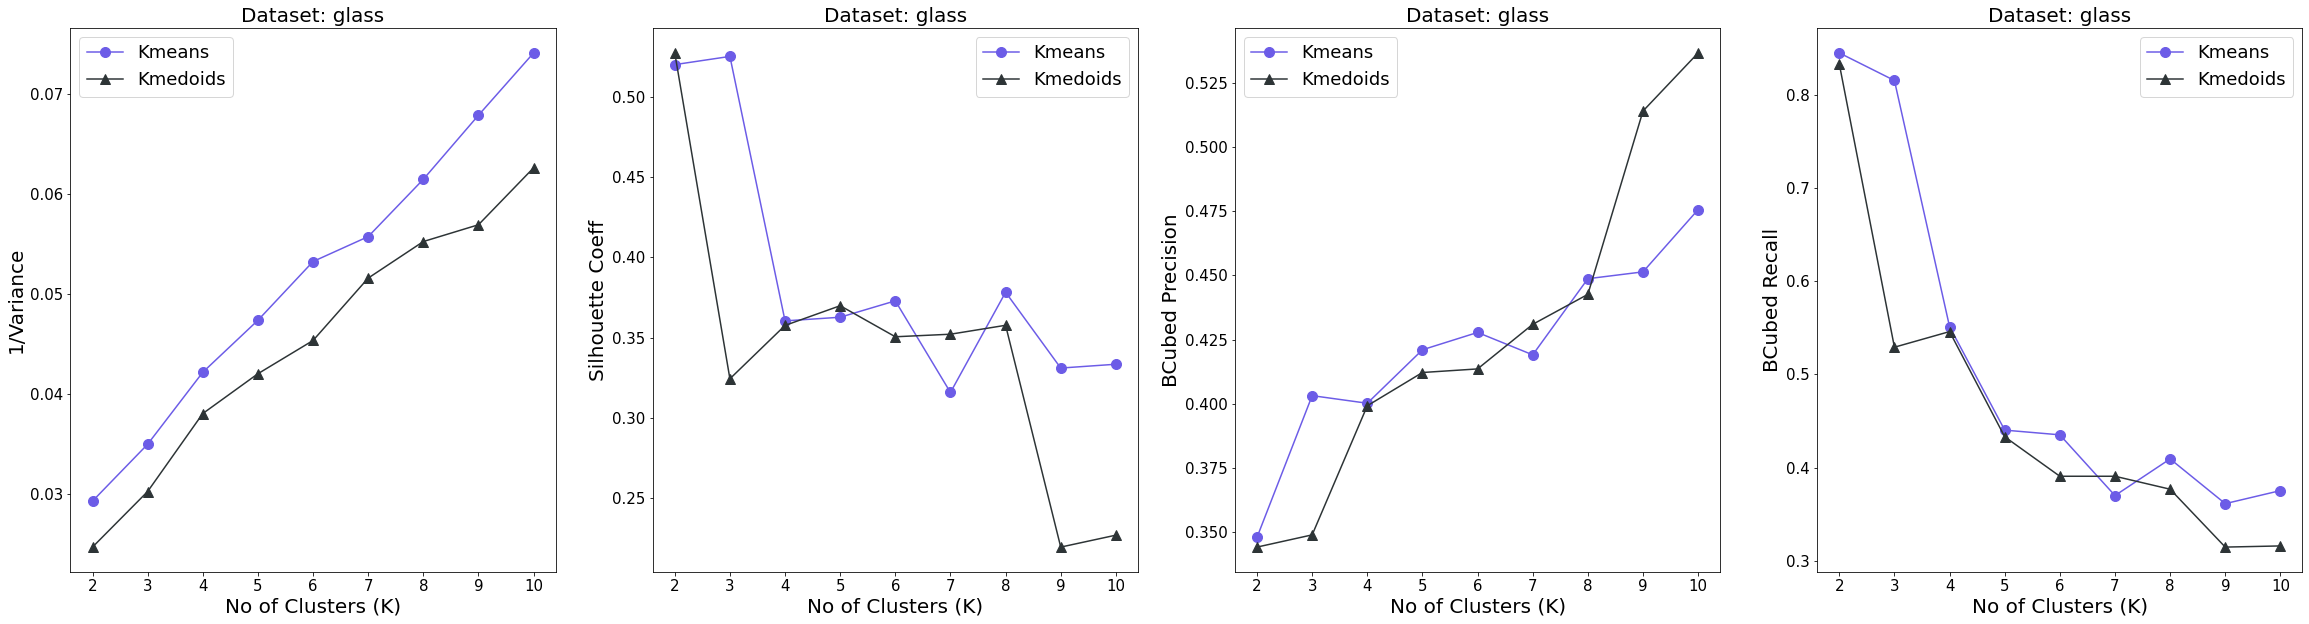

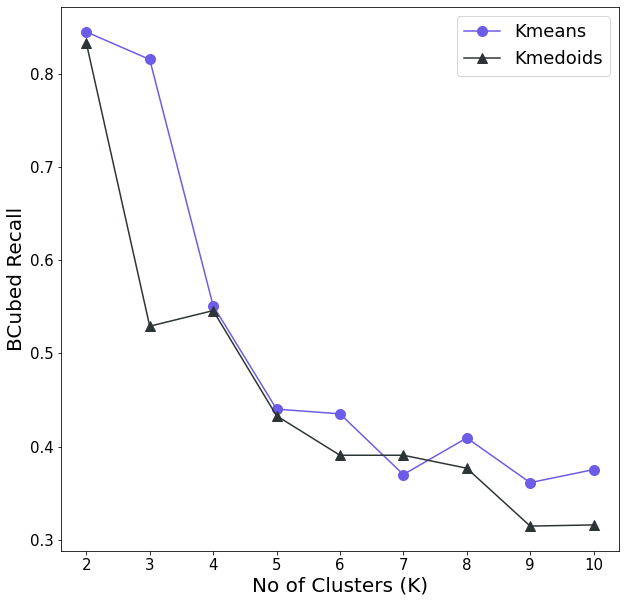

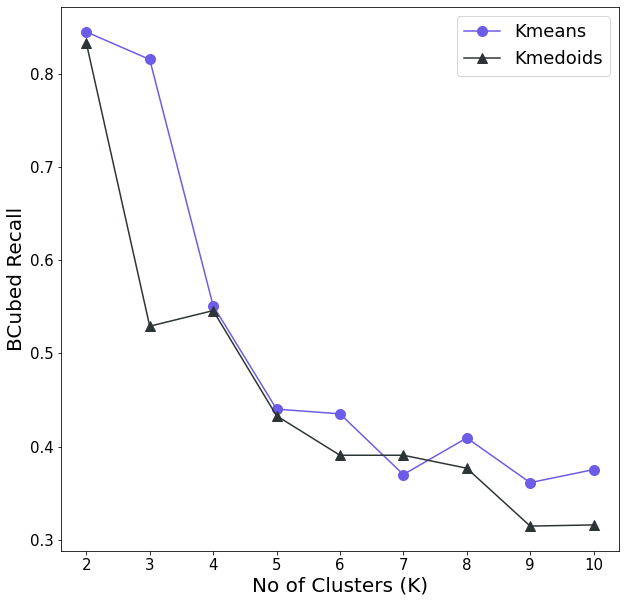

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_mining/Lab3/Datasets/glass.csv', sep=",",header=None)
dName = 'glass'
noOfInstances = df.shape[0]
X_df = df.iloc[:,1:-1]
Y_df = df.iloc[:,-1]
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))
XNum= X_df.fillna(X_df.mean()).to_numpy()
XNom = np.array([])
XOrd = np.array([])
Y= np.squeeze(Y_df.to_numpy())
print('no of unique Y label=',len(np.unique(Y)))
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True) 

### BuddyMove

instances = 249, features= 6 
no of unique Y label= 0
{'Kmeans': array([39.37987262, 29.91306409, 24.76013911, 21.68118552, 19.64357494,
       17.51196341, 15.98258081, 14.69471905, 13.93334746]), 'Kmedoids': array([41.22296467, 33.03013358, 28.0716492 , 24.33852692, 21.08068675,
       19.37512655, 17.76175648, 16.51515178, 15.38225378])}
{'Kmeans': array([0.39415954, 0.3484    , 0.3018155 , 0.29836476, 0.29018524,
       0.27513294, 0.26415366, 0.26538939, 0.26888205]), 'Kmedoids': array([0.3970516 , 0.34012395, 0.27720174, 0.26773407, 0.28217045,
       0.29662231, 0.28391247, 0.25492603, 0.26639363])}
{'Kmeans': array([], dtype=float64), 'Kmedoids': array([], dtype=float64)}
{'Kmeans': array([], dtype=float64), 'Kmedoids': array([], dtype=float64)}


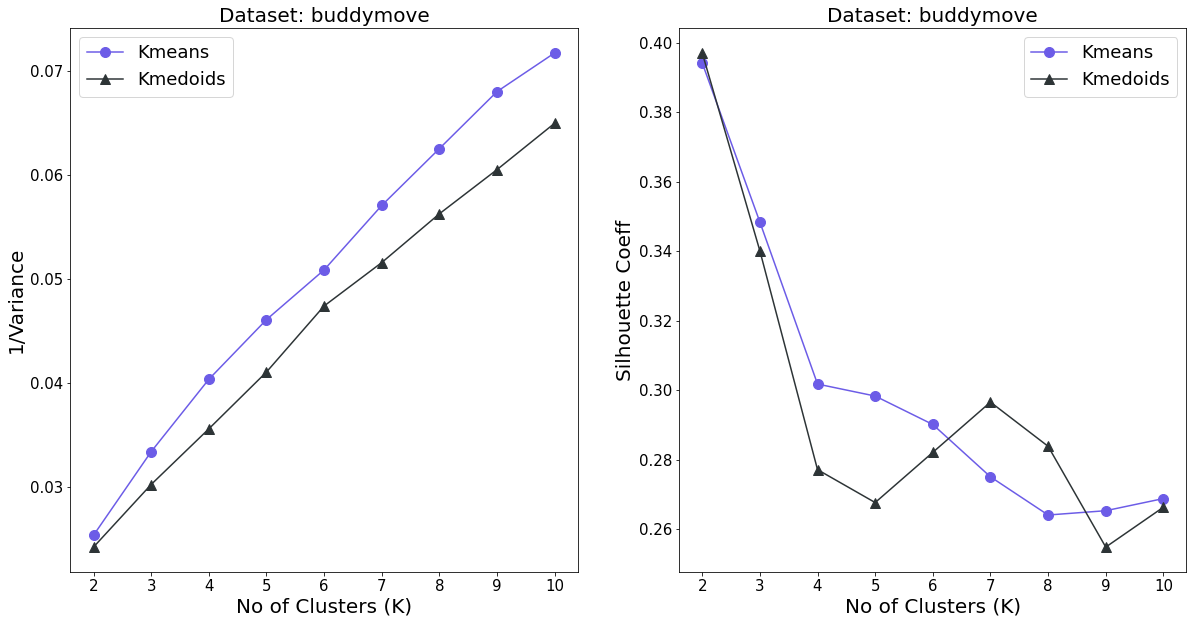

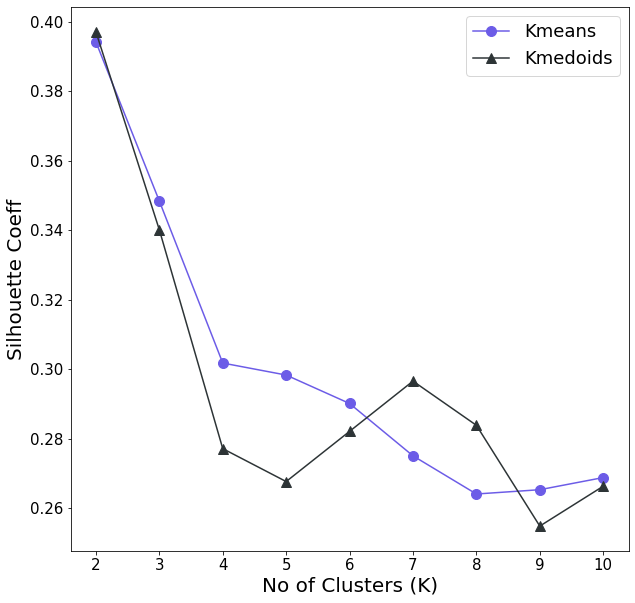

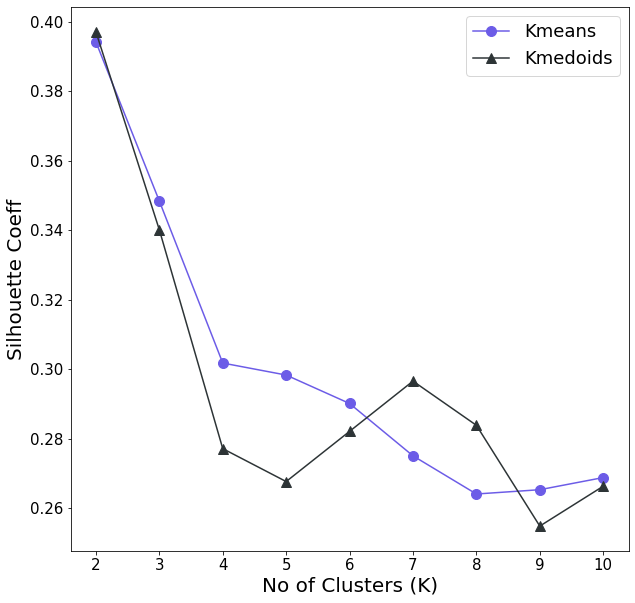

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_mining/Lab3/Datasets/buddymove.csv', sep=",",header=0)
# print(df)
dName = 'buddymove'
noOfInstances = df.shape[0]
X_df = df.iloc[:,1:]
# print(X_df)
# Y_df = df.iloc[:,-1]
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))
XNum= X_df.fillna(X_df.mean()).to_numpy()
# print(XNum)
XNom = np.array([])
XOrd = np.array([])
Y= np.array([])
print('no of unique Y label=',len(np.unique(Y)))
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= False)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK, groundTruth= False)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= False)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= False) 

### Seeds

instances = 210, features= 7 
no of unique Y label= 3
{'Kmeans': array([34.81326793, 22.02436308, 18.65404709, 16.165138  , 14.47774441,
       13.07208858, 12.12816145, 11.11692208, 10.47858599]), 'Kmedoids': array([36.86095473, 23.27331788, 19.67015264, 16.80652987, 15.53849415,
       14.20843608, 13.06074147, 12.27962752, 11.61488992])}
{'Kmeans': array([0.50511389, 0.42210526, 0.33852085, 0.29756841, 0.29873511,
       0.2857135 , 0.26986795, 0.2569239 , 0.25484545]), 'Kmedoids': array([0.50616486, 0.42129643, 0.34551876, 0.28703415, 0.27219489,
       0.26183015, 0.25954101, 0.23888491, 0.24570533])}
{'Kmeans': array([0.59632414, 0.80457774, 0.80990476, 0.84444943, 0.84937866,
       0.83445015, 0.84157087, 0.85208854, 0.86813028]), 'Kmedoids': array([0.59818473, 0.80726855, 0.84700961, 0.84409646, 0.84409646,
       0.85002866, 0.84999437, 0.85701587, 0.84380952])}
{'Kmeans': array([0.90545204, 0.80496894, 0.62443064, 0.54382333, 0.4868185 ,
       0.40234645, 0.37073844, 0.3055

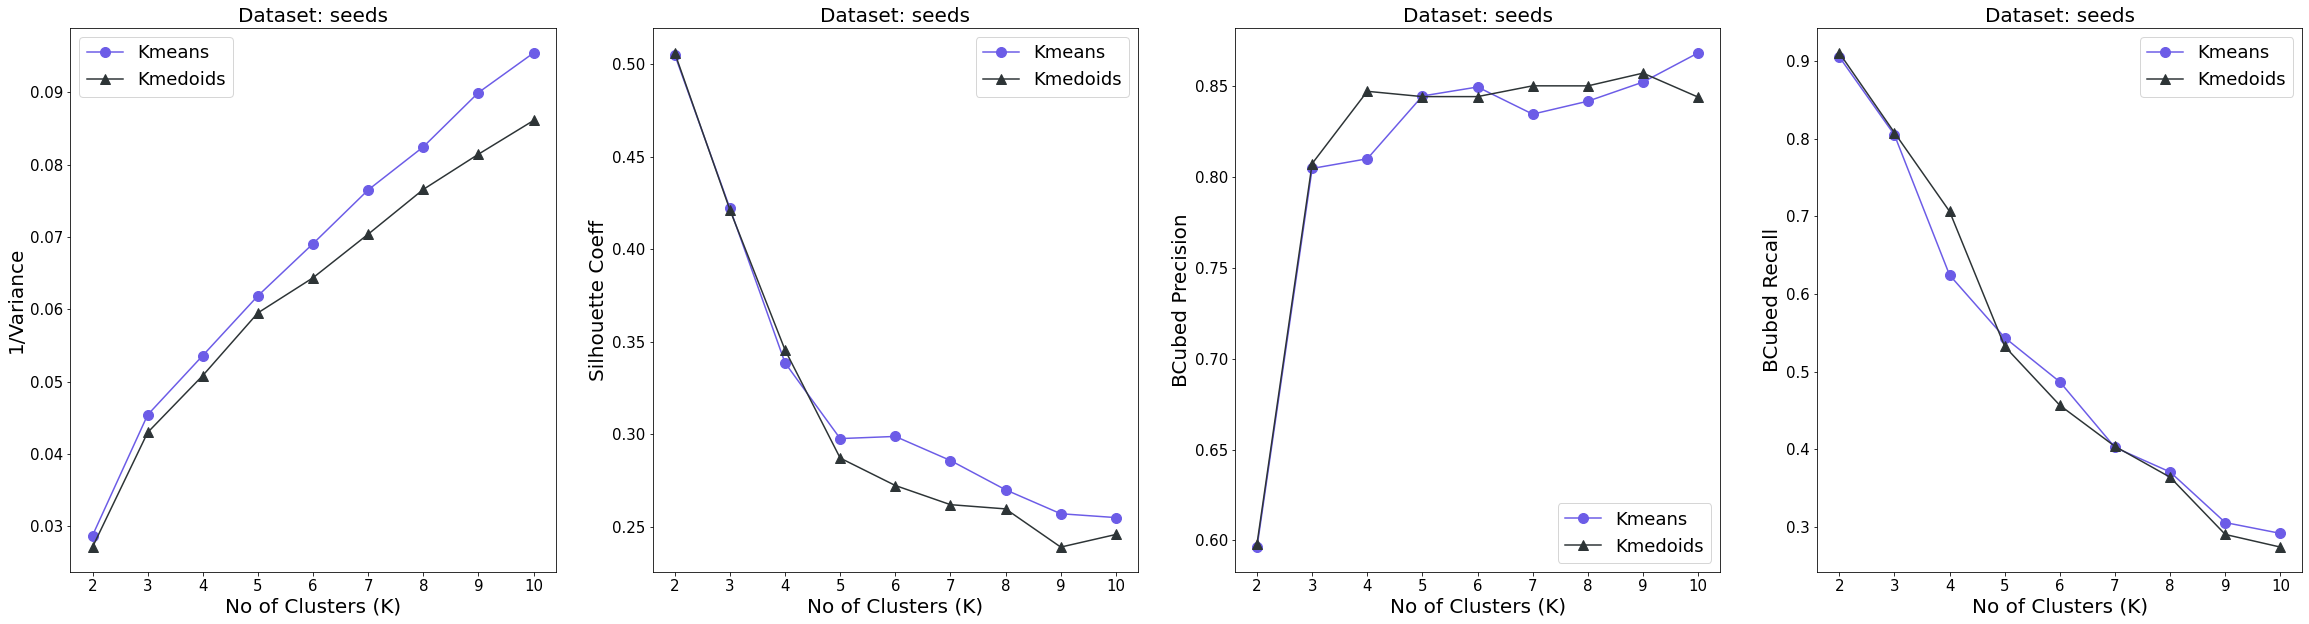

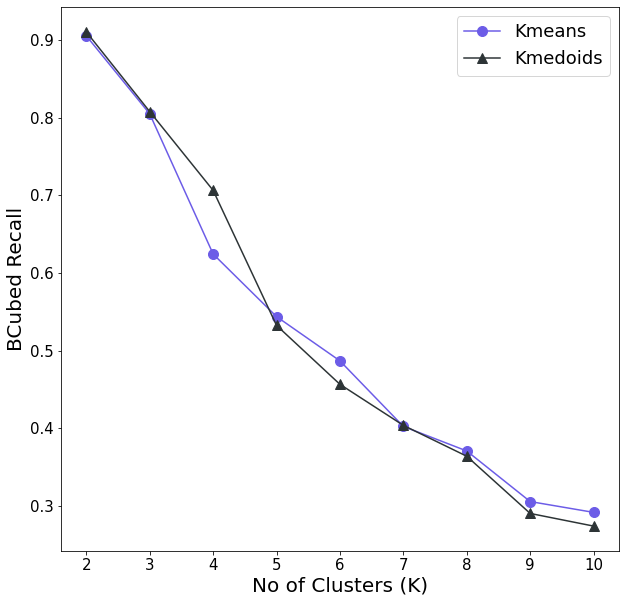

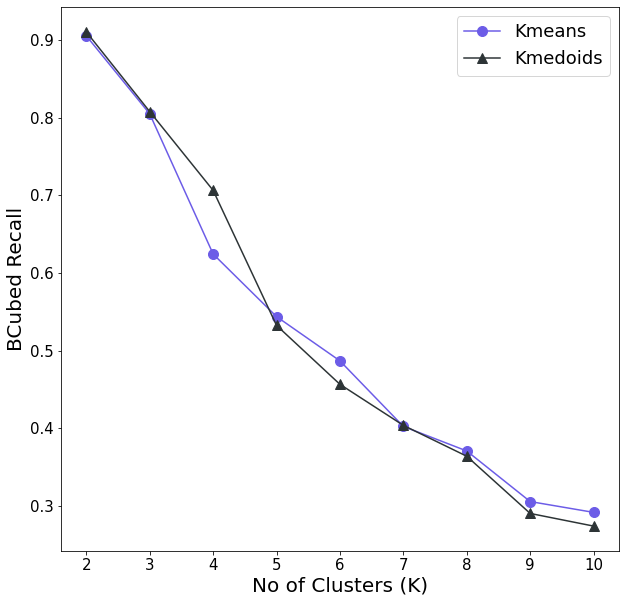

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data_mining/Lab3/Datasets/seeds.csv', sep=r'\s+',header=None)
# print(df)
dName = 'seeds'
noOfInstances = df.shape[0]
X_df = df.iloc[:,:-1]
# print(X_df)
Y_df = df.iloc[:,-1]
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))
XNum= X_df.fillna(X_df.mean()).to_numpy()
# print(XNum)
XNom = np.array([])
XOrd = np.array([])
Y= np.squeeze(Y_df.to_numpy())
print('no of unique Y label=',len(np.unique(Y)))
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True) 

### Parkinson

instances = 195, features= 22 
no of unique Y label= 2
{'Kmeans': array([98.67535306, 77.70490324, 65.51799563, 59.03562883, 53.71794013,
       50.18667885, 46.8721959 , 43.54959594, 41.53498506]), 'Kmedoids': array([120.60291176,  91.8082779 ,  80.46737476,  73.34824834,
        66.91205967,  62.25859652,  57.46240534,  55.88810991,
        53.4258946 ])}
{'Kmeans': array([0.27606753, 0.25208322, 0.21612655, 0.2033048 , 0.19786455,
       0.21016688, 0.16980482, 0.20462223, 0.20728219]), 'Kmedoids': array([0.24283133, 0.23505137, 0.20661197, 0.20728599, 0.19607633,
       0.20287325, 0.20553148, 0.19526366, 0.18665134])}
{'Kmeans': array([0.70213316, 0.72297735, 0.73289377, 0.73802198, 0.76653347,
       0.75441978, 0.77396825, 0.7498771 , 0.75958918]), 'Kmedoids': array([0.70681832, 0.70718832, 0.76302119, 0.74925815, 0.75623245,
       0.7506525 , 0.7692079 , 0.75667426, 0.7581685 ])}
{'Kmeans': array([0.62065332, 0.56361082, 0.3935251 , 0.3403777 , 0.24368465,
       0.20676786, 0

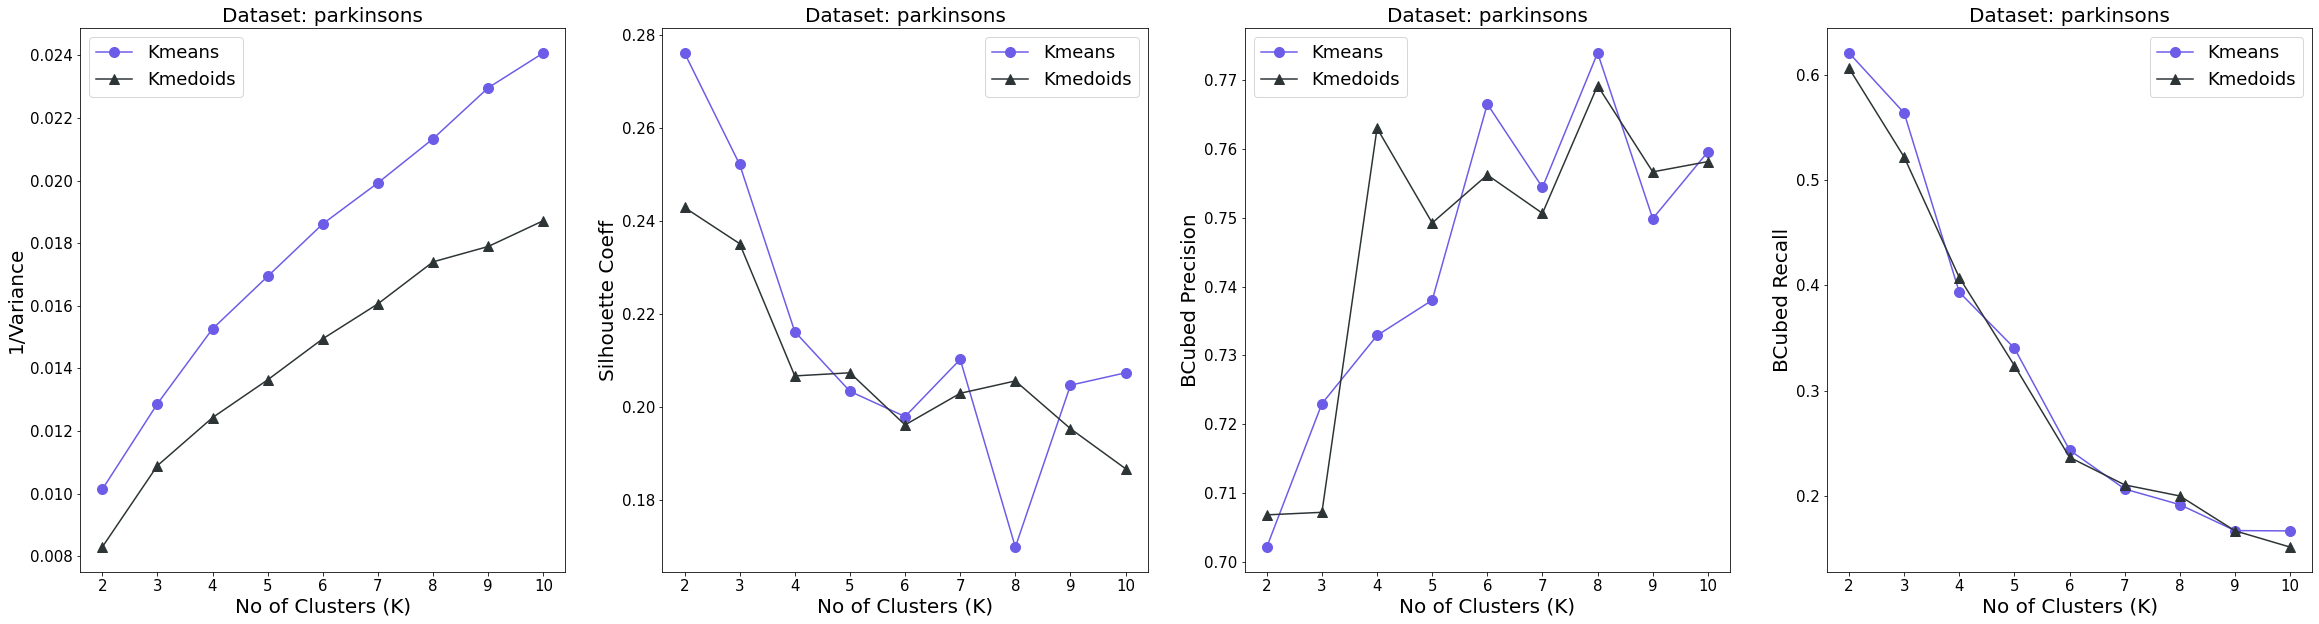

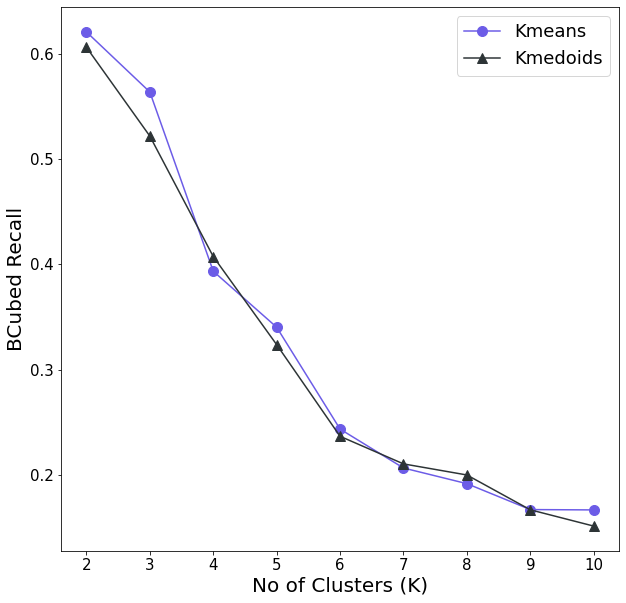

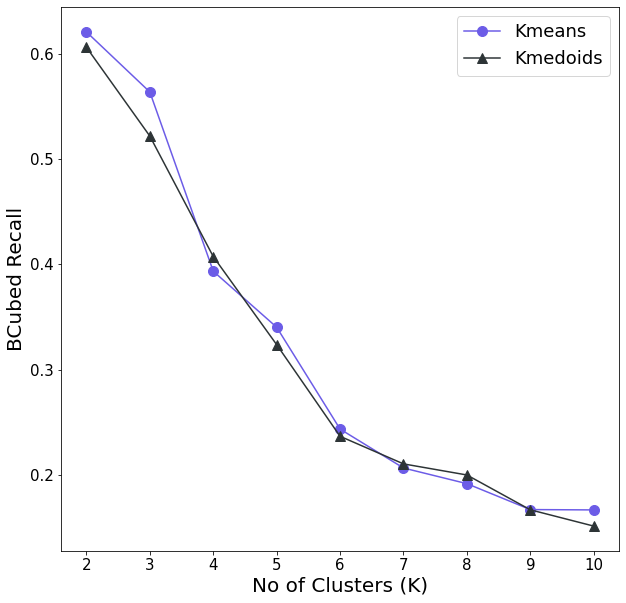

In [33]:
df = pd.read_csv('/content/drive/My Drive/Data_mining/Lab3/Datasets/parkinsons.data', sep=",",header=None)
df = df.iloc[1:, 1:] #removing first column and first row
dName = 'parkinsons'
noOfInstances = df.shape[0]
X_df = df.iloc[:,[i for i in range(len(df.columns)) if i!=16]]
Y_df = df.iloc[:,16] #17th column contains label]
X_df = X_df.astype('float64')
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))
XNum= X_df.fillna(X_df.mean()).to_numpy()
XNom = np.array([])
XOrd = np.array([])
Y= np.squeeze(Y_df.to_numpy())
print('no of unique Y label=',len(np.unique(Y)))
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True) 

### BreastTissue

instances = 106, features= 9 
no of unique Y label= 6
{'Kmeans': array([17.27844248, 13.20613796,  9.70514108,  8.40554938,  7.24560107,
        6.78524326,  6.36053002,  6.29889421,  5.85352601]), 'Kmedoids': array([18.18831617, 14.4646968 , 10.83002431,  9.27266728,  8.13592336,
        6.47954029,  5.89821413,  5.46159058,  4.91354586])}
{'Kmeans': array([0.5533808 , 0.50986419, 0.39382038, 0.37084148, 0.31862595,
       0.32257959, 0.28372086, 0.27340542, 0.28866855]), 'Kmedoids': array([0.5533808 , 0.3868884 , 0.40470943, 0.38412256, 0.31304309,
       0.33002312, 0.34163923, 0.30584202, 0.29099506])}
{'Kmeans': array([0.32039776, 0.3405666 , 0.42142011, 0.48842403, 0.51660242,
       0.49306778, 0.52283292, 0.52254349, 0.5966457 ]), 'Kmedoids': array([0.32039776, 0.38641509, 0.43197794, 0.47829012, 0.49818897,
       0.48875501, 0.50558713, 0.51130238, 0.51987871])}
{'Kmeans': array([0.93468795, 0.84131592, 0.66306424, 0.63251617, 0.48296805,
       0.40974944, 0.37157859, 0.3601

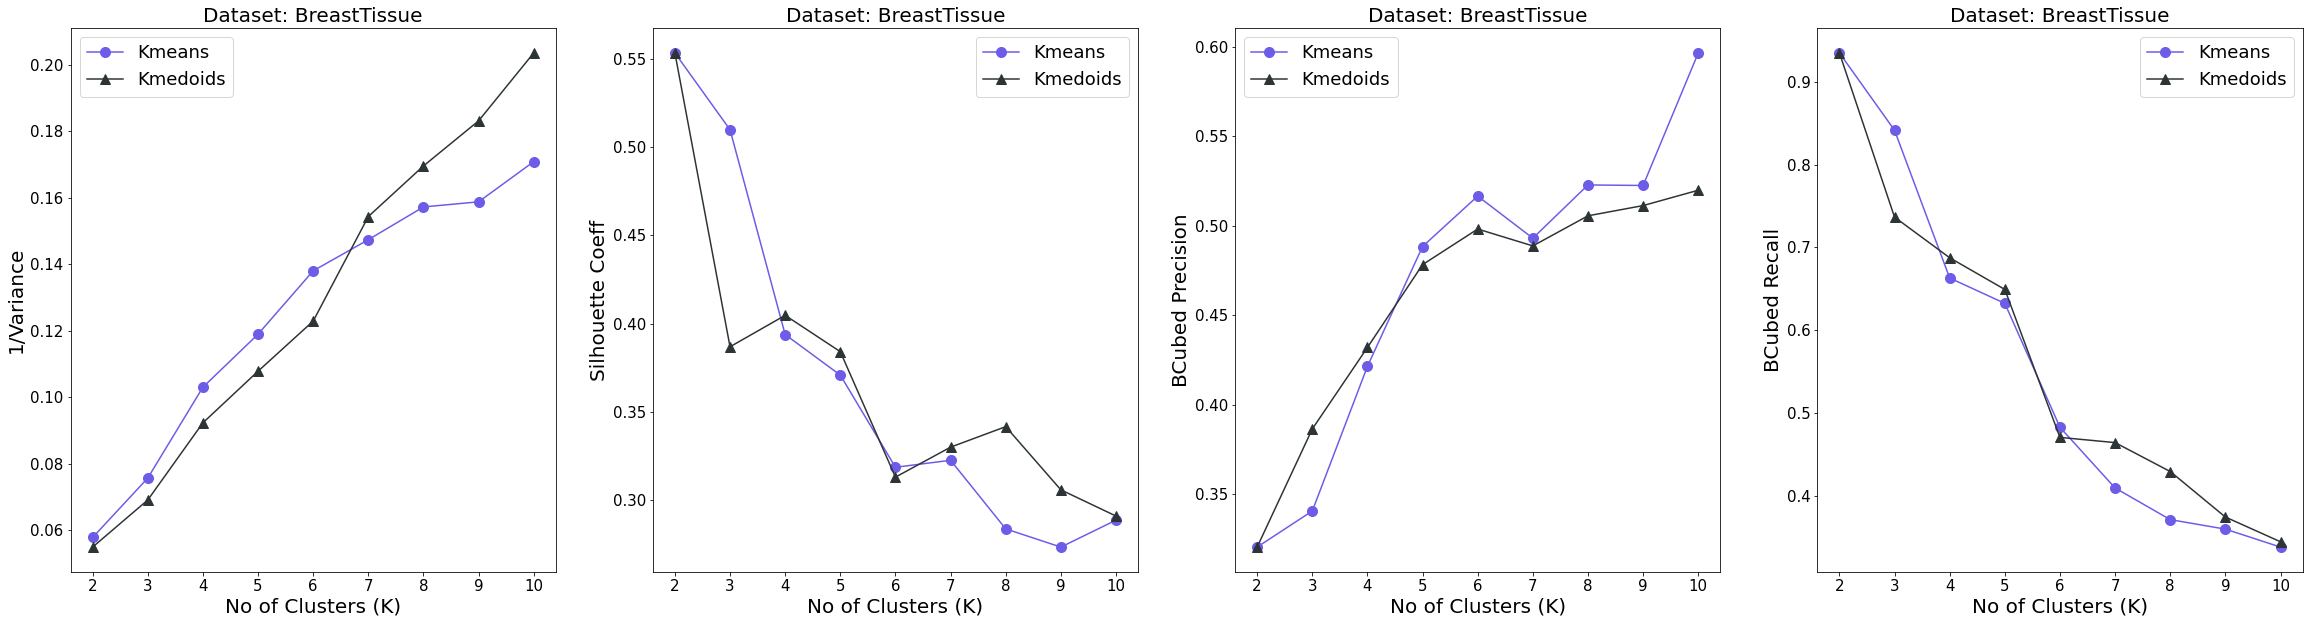

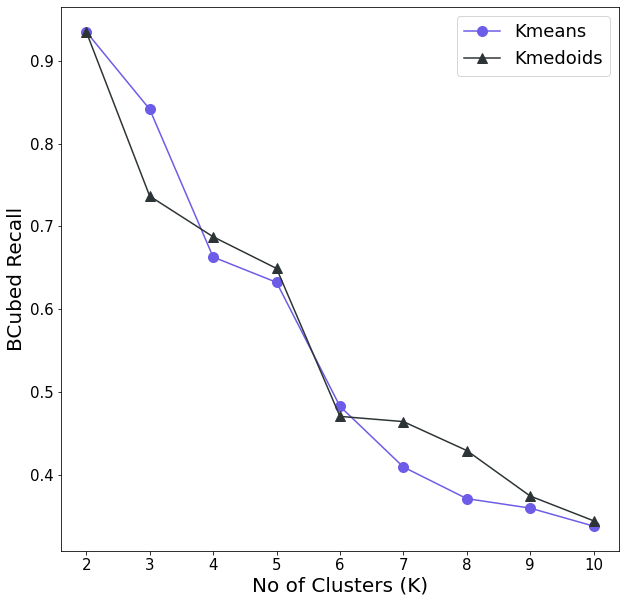

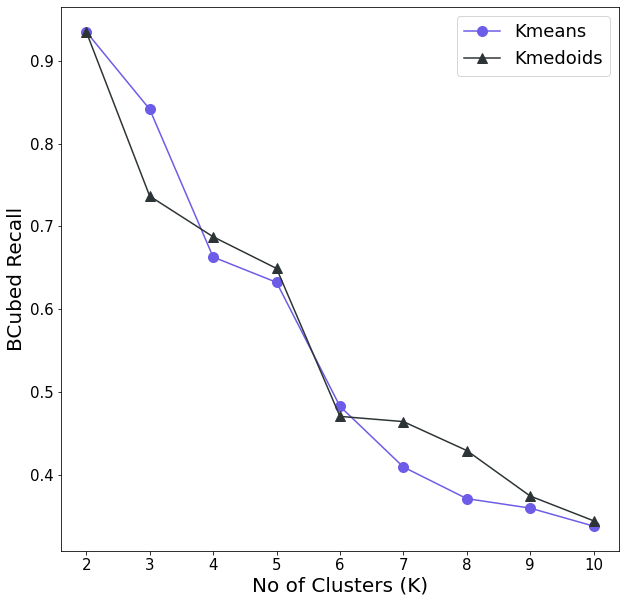

In [31]:
df = pd.read_excel('/content/drive/My Drive/Data_mining/Lab3/Datasets/BreastTissue.xls', sheet_name='Data')
# print(df)
dName = 'BreastTissue'
noOfInstances = df.shape[0]
X_df = df.iloc[:, 1:-1]
# print(X_df)
Y_df = df.iloc[:,-1]
print('instances = {}, features= {} '.format(X_df.shape[0], X_df.shape[1]))
XNum= X_df.fillna(X_df.mean()).to_numpy()
# print(XNum)
XNom = np.array([])
# print(XNum)
XOrd = np.array([])
Y= np.squeeze(Y_df.to_numpy())
print('no of unique Y label=',len(np.unique(Y)))
mxK = 10
results = runClusterAlgoForMultipleK(XNum, XNom, XOrd, noOfInstances, noOfIter = 5, mxK=mxK, Y=Y, groundTruth= True)
for key in results:
  print(results[key])
plotElbow(dName,results, mxK, groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'svg', groundTruth= True)
savePlotElbow(dName, results, mxK, fileExt= 'png', groundTruth= True) 